# Using XGBoost in Python

XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.
XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data.

In this tutorial, you’ll learn to build machine learning models using XGBoost in python. More specifically you will learn:

- what Boosting is and how XGBoost operates.
- how to apply XGBoost on a dataset and validate the results.
- about various hyper-parameters that can be tuned in XGBoost to improve model's performance.
- how to visualize the Boosted Trees and Feature Importance

But what makes XGBoost so popular?

- __Speed and performance__: Originally written in C++, it is comparatively faster than other ensemble classifiers.

- __Core algorithm is parallelizable__: Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.

- __Consistently outperforms other algorithm methods__: It has shown better performance on a variety of machine learning benchmark datasets.

- __Wide variety of tuning parameters__: XGBoost internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc.

XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library. But wait, what is boosting? Well, Let's move on to it.



## Boosting

Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant `t`, the model outcomes are weighed based on the outcomes of previous instant `t-1`. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. Note that a weak learner is one which is slightly better than random guessing. For example, a decision tree whose predictions are slightly better than `50%` in a binary classification problem. Let's understand boosting in general with a simple illustration.

<img src = 'http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528107577/output_1_0_ilvuyr.png' />

Four classifiers (in 4 boxes), shown above, are trying to classify `+` and `-` classes as homogeneously as possible.

1. Box 1: The first classifier (usually a decision stump) creates a vertical line (split) at `D1`. It says anything to the left of `D1` is + and anything to the right of `D1` is `-`. However, this classifier misclassifies three `+` points.

Note a Decision Stump is a Decision Tree model that only splits off at one level, therefore the final prediction is based on only one feature.

2. Box 2: The second classifier gives more weight to the three `+` misclassified points (see the bigger size of `+`) and creates a vertical line at `D2`. Again it says, anything to the right of D2 is `-` and left is `+`. Still, it makes mistakes by incorrectly classifying three `-` points.

3. Box 3: Again, the third classifier gives more weight to the three `-` misclassified points and creates a horizontal line at `D3`. Still, this classifier fails to classify the points (in the circles) correctly.

4. Box 4: This is a weighted combination of the weak classifiers (Box 1,2 and 3). As you can see, it does a good job at classifying all the points correctly.

That's the basic idea behind boosting algorithms is building a **weak** model, making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, **stronger** model and capitalize on the misclassification error of the previous model and try to reduce it. Now, let's come to XGBoost. To begin with, you should know about the default base learners of XGBoost: tree ensembles. The tree ensemble model is a set of classification and regression trees (CART). Trees are grown one after another ,and attempts to reduce the misclassification rate are made in subsequent iterations. [Here’s](https://xgboost.readthedocs.io/en/latest/model.html) a simple example of a CART that classifies whether someone will like computer games straight from the XGBoost's documentation.

If you check the image in Tree Ensemble section, you will notice each tree gives a different prediction score depending on the data it sees and the scores of each individual tree are summed up to get the final score.

If you would like a more detailed explanation on how Boost/XGBoost works, please refer to [this tutorial](https://xgboost.readthedocs.io/en/latest/tutorials/model.html).

## Using XGBoost in Python

In this tutorial, you will be using XGBoost to solve a regression problem. The dataset is taken from the UCI Machine Learning Repository and is also present in `sklearn`'s `datasets` module. It has `14` features describing various aspects of residential homes in Boston, the challenge is to predict the median value of owner-occupied homes per $1000s.

First of all, just like what you do with any other dataset, you are going to import the Boston Housing dataset and store it in a variable called boston. To import it from scikit-learn you will need to run this snippet.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

The boston variable itself is a `dictionary`, so you can check for its keys using the `.keys()` method.

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

You can easily check for its shape by using the `boston.data.shape` attribute, which will return the size of the dataset.

In [3]:
boston.data.shape

(506, 13)

In [4]:
# 506 rows, 13 columns

As you can see it returned `(506, 13)`, that means there are `506` rows of data with `13` columns. Now, if you want to know what the `13` columns are, you can simply use the `.feature_names` attribute and it will return the feature names.

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

The description of the dataset is available in the dataset itself. You can take a look at it using `.DESCR`.

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let’s convert it into a `pandas` DataFrame! For that you need to import the `pandas` library and call the `DataFrame()` function passing the argument `boston.data`. To label the names of the columns, use the `.columnns` attribute of the pandas DataFrame and assign it to `boston.feature_names`.

In [10]:
#### Do it Yourself
    # import pandas
import pandas as pd
    # convert to dataframe
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

Explore the top 5 rows of the dataset by using `head()` method on your pandas DataFrame.

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


You'll notice that there is no column called `PRICE` in the DataFrame. This is because the target column is available in another attribute called `boston.target`. Append `boston.target` to your pandas DataFrame.

In [13]:
data['PRICE'] = boston.target
data['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

Run the `.info()` method on your DataFrame to get useful information about the data.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
# no null values

Turns out that this dataset has `14` columns (including the target variable `PRICE`) and `506` rows. Notice that the columns are of float data-type indicating the presence of only __continuous__ features with __no missing__ values in any of the columns. To get more summary statistics of the different features in the dataset you will use the `describe()` method on your DataFrame.

Note that `describe()` only gives summary statistics of columns which are continuous in nature and not categorical.

In [16]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
# min max show outliers.. the difference between the min variables along the columns isnt huge
    # the max is not a huge difference either, but it shows differences among the numbers

If you plan to use XGBoost on a dataset which has categorical features you may want to consider applying some encoding (like **one-hot encoding**) to such features before training the model. 

__NOTE__: Like other ML models, XGBoost only works on numerical values

Also, if you have some missing values such as `NA` or `NaN` in the dataset you may or may not do a separate treatment for them, because XGBoost is capable of handling missing values internally. You can check out this [link](https://github.com/dmlc/xgboost/issues/21) if you wish to know more on this.

Without delving into more exploratory analysis and feature engineering (which we have done multiple times already), you will now focus on applying the algorithm to train the model on this data.

You will build the model using Trees as base learners (which are the default base learners) using XGBoost's `scikit-learn` compatible API. Along the way, you will also learn some of the common tuning parameters which XGBoost provides in order to improve the model's performance, and using the **root mean squared error (RMSE)** performance metric to check the performance of the trained model on the test set. Root mean Squared error is the square root of the mean of the squared differences between the actual and the predicted values. As usual, you start by importing the library `xgboost` and other important libraries that you will be using for building the model.

Note you can install python libraries like `xgboost` on your system using `pip install xgboost` on cmd.

In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

Separate the target variable and rest of the variables using `.iloc` to subset the data.

In [19]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

Now you will convert the dataset into an optimized data structure called `Dmatrix` that XGBoost supports and gives it acclaimed performance and efficiency gains. You will use this later in the tutorial.

In [21]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
data_dmatrix

## XGBoost's hyperparameters

At this point, before building the model, you should be aware of the tuning parameters that XGBoost provides. Well, there are a plethora of tuning parameters for tree-based learners in XGBoost and you can read all about them here. But the most common ones that you should know are:

- `learning_rate`: step size shrinkage used to prevent overfitting. Range is `[0,1]`
- `max_depth`: determines how deeply each tree is allowed to grow during any boosting round.
- `subsample`: percentage of samples used per tree. Low value can lead to underfitting.
- `colsample_bytree`: percentage of features used per tree. High value can lead to overfitting.
- `n_estimators`: number of trees you want to build - the more trees you build, the longer the training will be.
- `objective`: determines the loss function to be used like `reg:squarederror` for regression problems, `reg:logistic` for classification problems with only decision, `binary:logistic` for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

- `gamma`: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- `alpha`: L1 regularization on leaf weights. A large value leads to more regularization.
- `lambda`: L2 regularization on leaf weights and is smoother than L1 regularization.

It's also worth mentioning that though you are using trees as your base learners, you can also use XGBoost's relatively less popular linear base learners and one other tree learner known as dart. All you have to do is set the `booster` parameter to either `gbtree` (default),`gblinear` or `dart`.

Now, you will create the train and test set for cross-validation of the results using the `train_test_split` function from sklearn's `model_selection` module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a `random_state` is also assigned.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

The next step is to instantiate an XGBoost regressor object by calling the `XGBRegressor()` class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the `XGBClassifier()` class.

In [23]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

Fit the regressor to the training set and make predictions on the test set using the familiar `.fit()` and `.predict()` methods.

If you are using XGBoost for the __classification__ purposes, you can use the following code to print out the evaluation results.

In [25]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
preds

array([19.411713 , 22.651888 , 12.397994 , 15.161833 , 22.83002  ,
       21.9477   , 22.915876 , 22.549818 , 33.2537   , 26.954529 ,
       25.495129 , 26.931374 , 21.383516 , 16.268639 ,  9.339441 ,
       20.813406 , 12.512768 , 46.365307 , 21.598232 ,  7.1625657,
       32.274567 , 19.305819 , 21.858044 , 19.269388 , 11.756233 ,
       30.7522   , 22.867762 , 22.44307  , 18.88173  , 36.76713  ,
       10.8303795, 22.985353 , 17.7596   , 26.796082 , 14.183038 ,
       14.105803 , 15.050551 , 11.8683815, 32.762306 , 19.037666 ,
       43.192894 , 17.993746 , 20.378437 , 21.32027  , 28.655806 ,
       31.04819  , 24.886282 , 34.030155 , 14.249643 , 14.5933485,
       23.143763 , 18.06107  , 19.181463 , 26.379004 , 22.923622 ,
       23.324799 , 18.064003 , 35.437912 , 16.27525  , 20.483992 ,
       20.604326 , 31.74876  , 12.220079 , 17.438112 , 12.296903 ,
       31.703064 , 32.59789  , 28.618141 , 22.642958 , 24.85078  ,
       17.71818  , 31.836803 , 45.077377 , 21.777836 , 23.0748

In [26]:
# ^ predicted values

Compute the `rmse` by invoking the `mean_sqaured_error` function from sklearn's `metrics` module.

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.199790


Well, you can see that your `RMSE` for the price prediction came out to be around `3.21` per `$1,000`.

In [29]:
# ??? evals_result = clf.evals_result()

## k-fold Cross Validation using XGBoost
In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the `cv()` method. All you have to do is specify the `nfolds` parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters (check out this link) like:

- `num_boost_round`: denotes the number of trees you build (analogous to `n_estimators`)
- metrics: tells the evaluation metrics to be watched during CV (e.g. RMSE/MSE)
- as_pandas: to return the results in a `pandas` DataFrame.
- early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds - __VERY IMPORTANT TO AVOID OVERFITTING__.
- seed: for reproducibility of results - similar to `random_state` so you can retrieve the same folds.

This time you will create a hyper-parameter dictionary `params` which holds all the hyper-parameters and their values as key-value pairs but will exclude the `n_estimators` from the hyper-parameter dictionary because you will use `num_boost_rounds` instead.

You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's `cv()` method and store the results in a `cv_results` DataFrame. Note that here you are using the Dmatrix object you created before.

In [30]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

`cv_results` contains train and test RMSE metrics for each boosting round.

In [31]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.642327,0.315653,21.625379,1.298334
1,19.731120,0.293890,19.714096,1.299675
2,17.977031,0.246043,18.005742,1.299274
3,16.431517,0.239090,16.454775,1.261854
4,14.984148,0.240079,15.012413,1.203479


We can visualize how `RMSE` changed over training. You should observe a downward curve below.

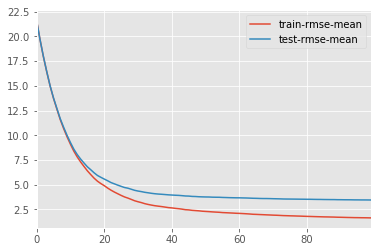

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results[['train-rmse-mean','test-rmse-mean']].plot()

Extract and print the final boosting round metric.

In [33]:
print((cv_results["test-rmse-mean"]).tail(1))

99    3.439236
Name: test-rmse-mean, dtype: float64


You can see that your `RMSE` for the price prediction has reduced as compared to last time and came out to be around 3.98 per $1,000. You can reach an even lower RMSE for a different set of hyper-parameters. You may consider applying techniques like **Grid Search**, **Random Search** and **Bayesian Optimization** to reach the optimal set of hyper-parameters.

## Visualize Boosting Trees and Feature Importance
You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a `plot_tree()` function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the `plot_tree()` function along with the number of trees you want to plot using the `num_trees` argument.

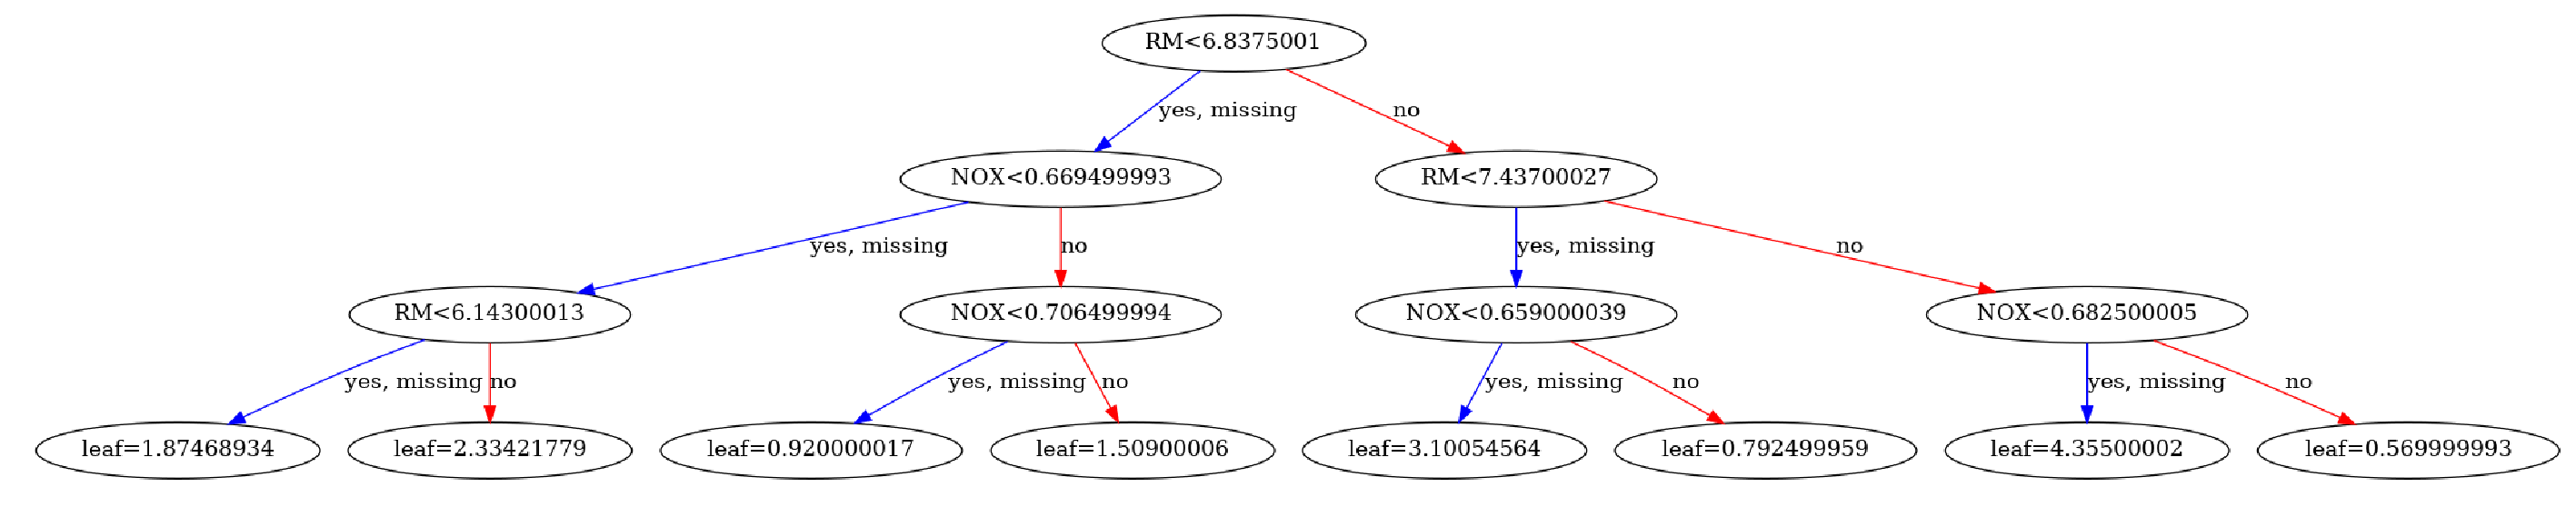

In [34]:
import graphviz
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

plt.rcParams['figure.figsize'] = [50, 30]
xgb.plot_tree(xg_reg,num_trees=0)

plt.show()

These plots provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions.

Note that if the above plot throws the `graphviz` error on your system, consider installing the graphviz package via `pip install graphviz` on cmd. You may also need to run `sudo apt-get install graphviz` on cmd. (link)

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a `plot_importance()` function that allows you to do exactly this.

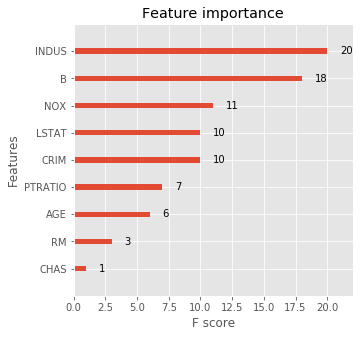

In [35]:
plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(xg_reg)

plt.show()

As you can see the feature `INDUS` has been given the highest importance score among all the features. Thus XGBoost also gives you a way to do **Feature Selection**. Isn't this brilliant?

If you would like to see how we can use `xgbclassifier`, please refer to [this tutorial](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/) where an `xgbclassifier` is trained on the Pima Diabetes dataset.

## Conclusion

You have reached the end of this tutorial. I hope this might have or will help you in some way or the other. You started off with understanding how Boosting works in general and then narrowed down to XGBoost specifically. You also practiced applying XGBoost on an open source dataset and along the way you learned about its hyper-parameters, doing cross-validation, visualizing the trees and in the end how it can also be used as a Feature Selection technique. Whoa!! that's something for starters, but there is so much to explore in XGBoost that it can't be covered in a single tutorial. 